Install libraries pandas , numpy ,scikit-learn
 ,transformers ,datasets and torch

In [ ]:
pip install pandas numpy scikit-learn transformers datasets torch

Import libraries

In [3]:
from transformers import BertForSequenceClassification, BertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, DistilBertForSequenceClassification, DistilBertTokenizer # BERT model and tokenizer  # RoBERTa model and tokenize # DistilBERT model and tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Evaluation metrics
import pandas as pd  # For data manipulation
import json # For handling JSON data

 Load the dataset Amazon consumer Reviews of Amazon Products

In [4]:
data = pd.read_csv("/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv") # Load the dataset
print(data.head()) # Display the first few rows of the dataset to understand its structure

                     id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Heal

Cleaning the dataset

In [4]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Drop rows with missing values in the 'reviews.text' column
data = data.dropna(subset=["reviews.text"])

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           5
sourceURLs                 0
dtype: int64


In [5]:
# Drop rows with missing values in both 'reviews.text' and 'reviews.rating' columns
data = data.dropna(subset=["reviews.text", "reviews.rating"])
# Map star ratings to sentiment classes (0: Negative, 1: Neutral, 2: Positive)
data["sentiment"] = data["reviews.rating"].apply(lambda x: 0 if x in [1, 2] else 1 if x == 3 else 2)


In [6]:
# Check for missing values again after cleaning
print(data.isnull().sum())

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           5
sourceURLs                 0
sentiment                  0
dtype: int64


Converting ratings into sentiment categories

In [7]:
# Define a function to map star ratings to sentiment classes
def map_star_to_sentiment(star):
    if star in [1, 2]:
        return "Negative"
    elif star == 3:
        return "Neutral"
    elif star in [4, 5]:
        return "Positive"
# Apply the mapping function to the 'reviews.rating' column
data['sentiment'] = data['reviews.rating'].apply(map_star_to_sentiment)

# Display the distribution of sentiment classes
print(data['sentiment'].value_counts())

sentiment
Positive    25545
Negative     1581
Neutral      1206
Name: count, dtype: int64


Cleaning the review text

In [8]:
# Import the regular expression library for text cleaning
import re

# Define a function to clean text (remove special characters, extra spaces, and convert to lowercase)
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text
# Apply the cleaning function to the 'reviews.text' column
data['reviews.text'] = data['reviews.text'].apply(clean_text)

Converting labels into numbers

In [9]:
# Create a mapping from sentiment labels to numerical values
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}

In [10]:
# Features (X): Review text
X = data["reviews.text"]

# # Labels (Y): Sentiment classes
Y = data["sentiment"]

Splitting the data into training and testing sets

In [11]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (90% training, 10% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Map sentiment labels to numerical values for training, validation, and testing sets
Y_train = Y_train.map(label_map)
Y_val = Y_val.map(label_map)
Y_test = Y_test.map(label_map)

# Display the sizes of the training, validation, and testing sets
print(f" Training set size: {len(X_train)}")
print(f" Validation set size: {len(X_val)}")
print(f" Testing set size: {len(X_test)}")

 Training set size: 20398
 Validation set size: 2267
 Testing set size: 5667


In [12]:
print(Y_train[:10])

16170    2
20741    2
15320    2
22399    0
5890     2
3103     2
18651    2
4312     2
7232     0
2543     2
Name: sentiment, dtype: int64


Encoding the data

In [13]:

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the training, validation, and testing sets
# Truncate and pad the sequences to a maximum length of 512 tokens
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [14]:
# Import the PyTorch library
import torch

In [15]:

 # Define a custom dataset class for handling tokenized data
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
      # Convert tokenized data to PyTorch tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are integers
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets for training, validation, and testing
train_dataset = ReviewDataset(train_encodings, Y_train.tolist())
val_dataset = ReviewDataset(val_encodings, Y_val.tolist())
test_dataset = ReviewDataset(test_encodings, Y_test.tolist())


Loading the model

In [16]:
# import libriry
from transformers import TrainingArguments
from transformers import Trainer

In [17]:
# Load the DistilBERT model for sequence classification with 3 output labels (Negative, Neutral, Positive)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Define training arguments (e.g., output directory, evaluation strategy, learning rate, batch size, etc.)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Create a Trainer instance with the model, training arguments, and datasets
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Train model

In [18]:
# Train the model using the Trainer instance
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alhanoofffj (alhanoofffj-ironhack) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.204800,0.171341
2,0.132500,0.167364
3,0.092600,0.169901


TrainOutput(global_step=3825, training_loss=0.1512202957253051, metrics={'train_runtime': 3025.3261, 'train_samples_per_second': 20.227, 'train_steps_per_second': 1.264, 'total_flos': 8106354556102656.0, 'train_loss': 0.1512202957253051, 'epoch': 3.0})

Calculating accuracy , precision , recall and F1

In [19]:

results = trainer.evaluate(test_dataset)
print(results)

{'eval_loss': 0.2065144032239914, 'eval_runtime': 87.2712, 'eval_samples_per_second': 64.936, 'eval_steps_per_second': 4.068, 'epoch': 3.0}


In [20]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

## Calculate evaluation metrics (accuracy, precision, recall, F1-score)
accuracy = accuracy_score(Y_test, preds)
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, preds, average="weighted")

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"precision (Precision): {precision}")
print(f"Recall (Recall): {recall}")
print(f" F1: {f1}")

Accuracy: 0.9527086641962238
precision (Precision): 0.9478543773096111
Recall (Recall): 0.9527086641962238
 F1: 0.9495346453996737


Confusion Matrix

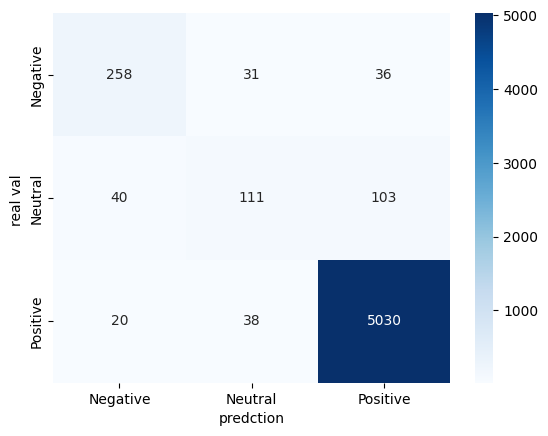

In [21]:
# Import libraries for plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(Y_test, preds)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("predction")
plt.ylabel("real val ")
plt.show()

In [22]:
trainer.save_model("saved_model")

In [23]:
tokenizer.save_pretrained("saved_model")

('saved_model/tokenizer_config.json',
 'saved_model/special_tokens_map.json',
 'saved_model/vocab.txt',
 'saved_model/added_tokens.json')